# Recursive DFA-algorithm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transduction import (
    FSA, FST, EPSILON, PrecoverDecomp, examples, Precover,    
    display_table, format_table, HTML, colors, LazyPrecoverNFA
)

In [90]:
from transduction.dfa_decomp import RecursiveDFADecomposition, check

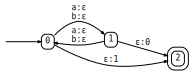

In [93]:
#f = examples.replace([('1', 'a'), ('2', 'b'), ('3', 'c'), ('4', 'd'), ('5', 'e')])
#target = 'abc'
f = examples.samuel_example()
target = 'cxx'

f = examples.parity({'a','b'})
target = '0'
#f = examples.newspeak2()
#target = 'bad'
f

In [94]:
start = RecursiveDFADecomposition(f, target[:0])
check(start)
start

work {(2, '1'),(0, '')}
✔ pass


quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(2, '1'),(0, '')} <!-- start->0 --> start->0","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start"


In [97]:
a = (start >> target[0])
check(a)
a

work {(2, '1'),(0, '')}
work {(1, ''),(2, '0')}
work {(0, '')}
✔ pass


In [7]:
ab = (a >> target[1])
check(ab)
ab

work {(1, ''),(2, 'c')}
work {(4, 'cx')}
work {(3, 'c'),(4, 'cx')}
✔ pass


In [8]:
abc = (ab >> target[2])
check(abc)
abc

work {(4, 'cx')}
work {(4, 'cxx')}
work {(3, 'c'),(4, 'cx')}
✔ pass


In [9]:
#for x in abc.Q.language(10):
#    print(x)

### Parity

In [10]:
f = examples.parity({'a'})
s = RecursiveDFADecomposition(f, '')
check(s)
s

work {(2, '1'),(0, '')}
✔ pass


quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(2, '1'),(0, '')} <!-- start->0 --> start->0","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start"


In [11]:
s0 = s >> '0'
check(s0)
s0

work {(2, '1'),(0, '')}
work {(1, ''),(2, '0')}
work {(0, '')}
✔ pass


quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(2, '1'),(0, '')} <!-- start->0 --> start->0 <!-- 1 --> 1 {(1, ''),(2, '0')} <!-- 0->1 --> 0->1 a <!-- 2 --> 2 {(0, '')} <!-- 1->2 --> 1->2 a <!-- 2->1 --> 2->1 a"


In [12]:
s1 = s >> '1'
check(s1)
s1

work {(2, '1'),(0, '')}
work {(1, '')}
work {(2, '1'),(0, '')}
✔ pass


quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(2, '1'),(0, '')} <!-- start->0 --> start->0 <!-- 1 --> 1 {(1, '')} <!-- 0->1 --> 0->1 a <!-- 1->0 --> 1->0 a"


In [13]:
#for xs, ys in f.relation(5):
#    print((xs, ys))

### Other Test Cases

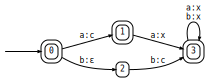

In [14]:
fst = FST()

fst.add_I(0)
fst.add_F(0)

# Direct C, like your original
fst.add_arc(0, 'a', 'c', 1)
fst.add_F(1)
fst.add_arc(1, 'a', 'x', 3)

# Indirect C via epsilon-output
fst.add_arc(0, 'b', EPSILON, 2)
fst.add_arc(2, 'b', 'c', 3)

fst.add_F(3)
fst.add_arc(3, 'a', 'x', 3)
fst.add_arc(3, 'b', 'x', 3)

fst

work {(0, '')}
work {(2, '')}
work {(3, 'c')}
work {(1, 'c')}
work {(3, 'cx')}


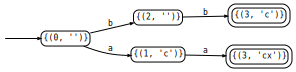

In [15]:
s = RecursiveDFADecomposition(fst, '')
display(s.Q.trim())
display(s.R.trim())

In [16]:
display_table([Precover(fst, '').decomposition], headings=['quotient', 'remainder'])

In [17]:
display_table([Precover(fst, 'c').decomposition], headings=['quotient', 'remainder'])

In [18]:
for x,y in fst.relation(10):
    print([x,y])

['', '']
['a', 'c']
['aa', 'cx']
['bb', 'c']
['aaa', 'cxx']
['aab', 'cxx']
['bba', 'cx']
['bbb', 'cx']
['aaaa', 'cxxx']
['aaab', 'cxxx']
['aaba', 'cxxx']
['aabb', 'cxxx']
['bbaa', 'cxx']
['bbab', 'cxx']
['bbba', 'cxx']
['bbbb', 'cxx']
['aaaaa', 'cxxxx']
['aaaab', 'cxxxx']
['aaaba', 'cxxxx']
['aaabb', 'cxxxx']
['aabaa', 'cxxxx']
['aabab', 'cxxxx']
['aabba', 'cxxxx']
['aabbb', 'cxxxx']
['bbaaa', 'cxxx']
['bbaab', 'cxxx']
['bbaba', 'cxxx']
['bbabb', 'cxxx']
['bbbaa', 'cxxx']
['bbbab', 'cxxx']
['bbbba', 'cxxx']
['bbbbb', 'cxxx']
['aaaaaa', 'cxxxxx']
['aaaaab', 'cxxxxx']
['aaaaba', 'cxxxxx']
['aaaabb', 'cxxxxx']
['aaabaa', 'cxxxxx']
['aaabab', 'cxxxxx']
['aaabba', 'cxxxxx']
['aaabbb', 'cxxxxx']
['aabaaa', 'cxxxxx']
['aabaab', 'cxxxxx']
['aababa', 'cxxxxx']
['aababb', 'cxxxxx']
['aabbaa', 'cxxxxx']
['aabbab', 'cxxxxx']
['aabbba', 'cxxxxx']
['aabbbb', 'cxxxxx']
['bbaaaa', 'cxxxx']
['bbaaab', 'cxxxx']
['bbaaba', 'cxxxx']
['bbaabb', 'cxxxx']
['bbabaa', 'cxxxx']
['bbabab', 'cxxxx']
['bbabba', 'c

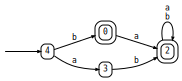

In [19]:
(FSA.universal(fst.A - {''}) - (fst @ FSA.universal(fst.B - {''})).project(0)).min()

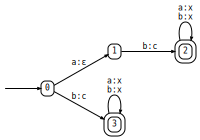

In [99]:
fst = FST()

fst.add_I(0)

# Path 1: 0 -b|c-> 3
fst.add_arc(0, 'b', 'c', 3)

# Path 2: 0 -a|ε-> 1; 1 -b|c-> 2
fst.add_arc(0, 'a', EPSILON, 1)
fst.add_arc(1, 'b', 'c', 2)

# After we have emitted 'c', we only emit 'x' forever.
for q in (2, 3):
    fst.add_F(q)
    fst.add_arc(q, 'a', 'x', q)
    fst.add_arc(q, 'b', 'x', q)

fst

In [100]:
display_table([Precover(fst, 'c').decomposition])

"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 3 <!-- start->0 --> start->0 <!-- 1 --> 1 0 <!-- 0->1 --> 0->1 b <!-- 2 --> 2 2 <!-- 0->2 --> 0->2 a <!-- 2->1 --> 2->1 b","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start"


In [101]:
display_table([Precover(fst, 'x').decomposition])

"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start"


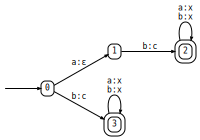

In [102]:
fst = FST()

fst.add_I(0)

# Path 1: 0 -b|c-> 3
fst.add_arc(0, 'b', 'c', 3)

# Path 2: 0 -a|ε-> 1; 1 -b|c-> 2
fst.add_arc(0, 'a', EPSILON, 1)
fst.add_arc(1, 'b', 'c', 2)

# After we have emitted 'c', we only emit 'x' forever.
for q in (2, 3):
    fst.add_F(q)
    fst.add_arc(q, 'a', 'x', q)
    fst.add_arc(q, 'b', 'x', q)

fst

In [103]:
display_table([Precover(fst, 'c').decomposition], headings=['quotient', 'remainder'])

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 3 <!-- start->0 --> start->0 <!-- 1 --> 1 0 <!-- 0->1 --> 0->1 b <!-- 2 --> 2 2 <!-- 0->2 --> 0->2 a <!-- 2->1 --> 2->1 b","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start"


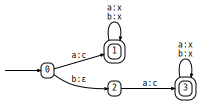

In [104]:
fst = FST()

fst.add_I(0)

# Path A: 'a' -> 'c'
fst.add_arc(0, 'a', 'c', 1)

# Path B: 'b' (ε) then 'a' -> 'c'
fst.add_arc(0, 'b', EPSILON, 2)
fst.add_arc(2, 'a', 'c', 3)

# After 'c', just loop with 'x'
for q in (1, 3):
    fst.add_F(q)
    fst.add_arc(q, 'a', 'x', q)
    fst.add_arc(q, 'b', 'x', q)

fst

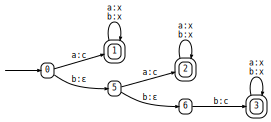

In [105]:

fst = FST()

fst.add_I(0)

# Path 1: 'a' -> 'c'
fst.add_arc(0, 'a', 'c', 1)

# Path 2: 'b' (ε) then 'a' -> 'c'  i.e., "ba"
fst.add_arc(0, 'b', EPSILON, 5)
fst.add_arc(5, 'a', 'c', 2)

# Path 3: 'b' (ε), then 'b' (ε), then 'b' -> 'c'  i.e., "bbb"
fst.add_arc(5, 'b', EPSILON, 6)
fst.add_arc(6, 'b', 'c', 3)

# After 'c', loop 'x' on both symbols
for q in (1, 2, 3):
    fst.add_F(q)
    fst.add_arc(q, 'a', 'x', q)
    fst.add_arc(q, 'b', 'x', q)

fst

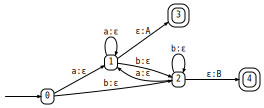

In [106]:
fst = FST()

fst.add_I(0)

# Transition: track last symbol, no output yet.
fst.add_arc(0, 'a', EPSILON, 1)
fst.add_arc(0, 'b', EPSILON, 2)

fst.add_arc(1, 'a', EPSILON, 1)
fst.add_arc(1, 'b', EPSILON, 2)

fst.add_arc(2, 'a', EPSILON, 1)
fst.add_arc(2, 'b', EPSILON, 2)

# Final ε-output arcs
fst.add_arc(1, EPSILON, 'A', 3)   # last was a
fst.add_arc(2, EPSILON, 'B', 4)   # last was b

fst.add_F(3)
fst.add_F(4)

fst

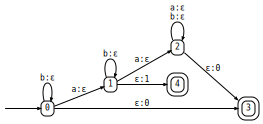

In [107]:
fst = FST()

fst.add_I(0)

# From state 0
fst.add_arc(0, 'a', EPSILON, 1)  # first a
fst.add_arc(0, 'b', EPSILON, 0)  # still zero a's

# From state 1
fst.add_arc(1, 'a', EPSILON, 2)  # second a
fst.add_arc(1, 'b', EPSILON, 1)  # still exactly one a

# From state 2
fst.add_arc(2, 'a', EPSILON, 2)
fst.add_arc(2, 'b', EPSILON, 2)

# Final ε-output arcs
fst.add_arc(0, EPSILON, '0', 3)  # zero a's
fst.add_arc(1, EPSILON, '1', 4)  # exactly one a
fst.add_arc(2, EPSILON, '0', 3)  # at least two a's

fst.add_F(3)
fst.add_F(4)

fst

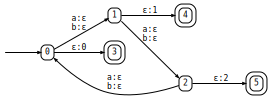

In [108]:
fst = FST()

fst.add_I(0)

# Cycle mod 3 on any input symbol, no output
for s_from, s_to in [(0, 1), (1, 2), (2, 0)]:
    fst.add_arc(s_from, 'a', EPSILON, s_to)
    fst.add_arc(s_from, 'b', EPSILON, s_to)

# Final ε-output arcs
fst.add_arc(0, EPSILON, '0', 3)
fst.add_arc(1, EPSILON, '1', 4)
fst.add_arc(2, EPSILON, '2', 5)

fst.add_F(3)
fst.add_F(4)
fst.add_F(5)

fst

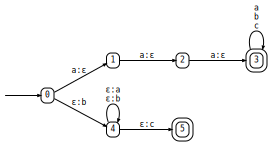

In [109]:
fst = FST()

fst.add_I(0)

fst.add_arc(0, 'a', '', 1) 
fst.add_arc(1, 'a', '', 2)
fst.add_arc(2, 'a', '', 3) 

fst.add_arc(3, 'a', 'a', 3)
fst.add_arc(3, 'b', 'b', 3)
fst.add_arc(3, 'c', 'c', 3)

fst.add_arc(0, '', 'b', 4) 

fst.add_arc(4, '', 'a', 4) 
fst.add_arc(4, '', 'b', 4) 
fst.add_arc(4, '', 'c', 5) 
fst.add_F(5)

fst.add_F(3)

fst

In [110]:
display_table([Precover(fst, 'bbbc').decomposition], headings=['quotient', 'remainder'])

In [111]:
display_table([Precover(fst, '').decomposition], headings=['quotient', 'remainder'])

### INFINITE QUOTIENT????

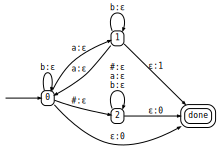

In [201]:
# fst = FST()

# fst.add_I(0)

# # From start (state 0)
# fst.add_arc(0, 'a', EPSILON, 1)   # odd a-count
# fst.add_arc(0, 'b', EPSILON, 0)   # still even
# fst.add_arc(0, '#', EPSILON, 2)   # enter absorbing 0-region

# # Parity-tracking region (no '#' allowed anymore)
# fst.add_arc(1, 'a', EPSILON, 0)
# fst.add_arc(1, 'b', EPSILON, 1)

# # Absorbing region: stay in 2 on any input
# fst.add_arc(2, 'a', EPSILON, 2)
# fst.add_arc(2, 'b', EPSILON, 2)
# fst.add_arc(2, '#', EPSILON, 2)

# # even → '0', odd → '1', absorbing → '0'
# fst.add_arc(0, '', '0', 'done')
# fst.add_F('done')

# fst.add_arc(1, '', '1', 'done')
# fst.add_F('done')

# fst.add_arc(2, '', '0', 'done')


# fst

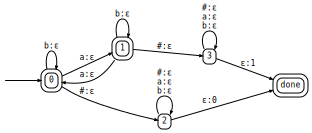

In [263]:
fst = FST()

fst.add_I(0)

# From start (state 0)
fst.add_arc(0, 'a', EPSILON, 1)   # odd a-count
fst.add_arc(0, 'b', EPSILON, 0)   # still even

# Parity-tracking region (no '#' allowed anymore)
fst.add_arc(1, 'a', EPSILON, 0)
fst.add_arc(1, 'b', EPSILON, 1)

# Exit parity region
fst.add_arc(0, '#', EPSILON, 2)
fst.add_arc(1, '#', EPSILON, 3)

# Absorbing region: 
fst.add_arc(2, 'a', EPSILON, 2)
fst.add_arc(2, 'b', EPSILON, 2)
fst.add_arc(2, '#', EPSILON, 2)

# Absorbing region:
fst.add_arc(3, 'a', EPSILON, 3)
fst.add_arc(3, 'b', EPSILON, 3)
fst.add_arc(3, '#', EPSILON, 3)

# even → '0', odd → '1', absorbing → '0'
#fst.add_arc(0, '', '0', 'done')
fst.add_F('done')
fst.add_arc(3, '', '1', 'done')
fst.add_arc(2, '', '0', 'done')

fst.add_F(0)
fst.add_F(1)

fst

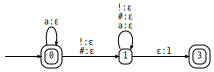

In [306]:
fst = examples.infinite_quotient(separators=('#','!'))
fst

In [307]:
display_table([Precover(fst, '').decomposition], headings=['quotient', 'remainder'])

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 0 <!-- start->0 --> start->0","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start"


In [308]:
display_table([Precover(fst, '0').decomposition], headings=['quotient', 'remainder'])

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start"


In [309]:
display_table([Precover(fst, '1').decomposition], headings=['quotient', 'remainder'])

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 2 <!-- start->0 --> start->0 <!-- 0->0 --> 0->0 a <!-- 1 --> 1 0 <!-- 0->1 --> 0->1 ! #","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start"


In [310]:
#display_table(list(fst.relation(5)), headings=['x', 'y'])

In [312]:
list(fst.relation(10))

[('', ''),
 ('a', ''),
 ('aa', ''),
 ('#', '1'),
 ('!', '1'),
 ('aaa', ''),
 ('a#', '1'),
 ('a!', '1'),
 ('#a', '1'),
 ('##', '1'),
 ('#!', '1'),
 ('!a', '1'),
 ('!#', '1'),
 ('!!', '1'),
 ('aaaa', ''),
 ('aa#', '1'),
 ('aa!', '1'),
 ('a#a', '1'),
 ('a##', '1'),
 ('a#!', '1'),
 ('a!a', '1'),
 ('a!#', '1'),
 ('a!!', '1'),
 ('#aa', '1'),
 ('#a#', '1'),
 ('#a!', '1'),
 ('##a', '1'),
 ('###', '1'),
 ('##!', '1'),
 ('#!a', '1'),
 ('#!#', '1'),
 ('#!!', '1'),
 ('!aa', '1'),
 ('!a#', '1'),
 ('!a!', '1'),
 ('!#a', '1'),
 ('!##', '1'),
 ('!#!', '1'),
 ('!!a', '1'),
 ('!!#', '1'),
 ('!!!', '1'),
 ('aaaaa', ''),
 ('aaa#', '1'),
 ('aaa!', '1'),
 ('aa#a', '1'),
 ('aa##', '1'),
 ('aa#!', '1'),
 ('aa!a', '1'),
 ('aa!#', '1'),
 ('aa!!', '1'),
 ('a#aa', '1'),
 ('a#a#', '1'),
 ('a#a!', '1'),
 ('a##a', '1'),
 ('a###', '1'),
 ('a##!', '1'),
 ('a#!a', '1'),
 ('a#!#', '1'),
 ('a#!!', '1'),
 ('a!aa', '1'),
 ('a!a#', '1'),
 ('a!a!', '1'),
 ('a!#a', '1'),
 ('a!##', '1'),
 ('a!#!', '1'),
 ('a!!a', '1'),
 ('a!!#

In [299]:
from arsenal.iterextras import groupby2
for x, ys in groupby2(fst.relation(10), lambda xy: xy[0]).items():
    assert len(ys) == 1, [x, ys]

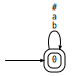

In [276]:
(fst @ FSA.universal(fst.B - {''})).project(0).min()

In [277]:
P = Precover(fst, '')
U = FSA.universal(fst.A - {''})
Q, R = P.decomposition
assert (Q * U & R).equal(FSA.zero)
assert (Q * U | R).equal(P.min)

In [278]:
P = Precover(fst, '0')
U = FSA.universal(fst.A - {''})
Q, R = P.decomposition
assert (Q * U & R).equal(FSA.zero)
assert (Q * U | R).equal(P.min)

In [279]:
P = Precover(fst, '1')
U = FSA.universal(fst.A - {''})
Q, R = P.decomposition
assert (Q * U & R).equal(FSA.zero)
assert (Q * U | R).equal(P.min)